# Исследование объявлений о продаже квартир


В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


**Цель исследования:** 
* Поиск особенностей и зависимостей, которые есть на рынке недвижимости
* Найти параметры, по которым определяется цена недвижимости для определения системой аномалий и мошеннической активности

**Ход исследования:**
* Открыть и изучить общую информацию датасета
* Предобработка данных
* Дополнить таблицу новыми столбцами
* Исследовательский анализ
* Факторы влияния на стоимость объекта

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area`— жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # использовали табуляцию, так как данные склеились
except:
    df = pd.read_csv(r'C:\Users\niksmns\Desktop\project_sales_appart\real_estate_data.csv', sep='\t')

In [3]:
def general_info(data):
    display(data.head(10))
    display(data.info())
    display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))
    display('Количество дубликатов:', data.duplicated().sum())
    display(df.columns)

In [4]:
general_info(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


'Количество дубликатов:'

0

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

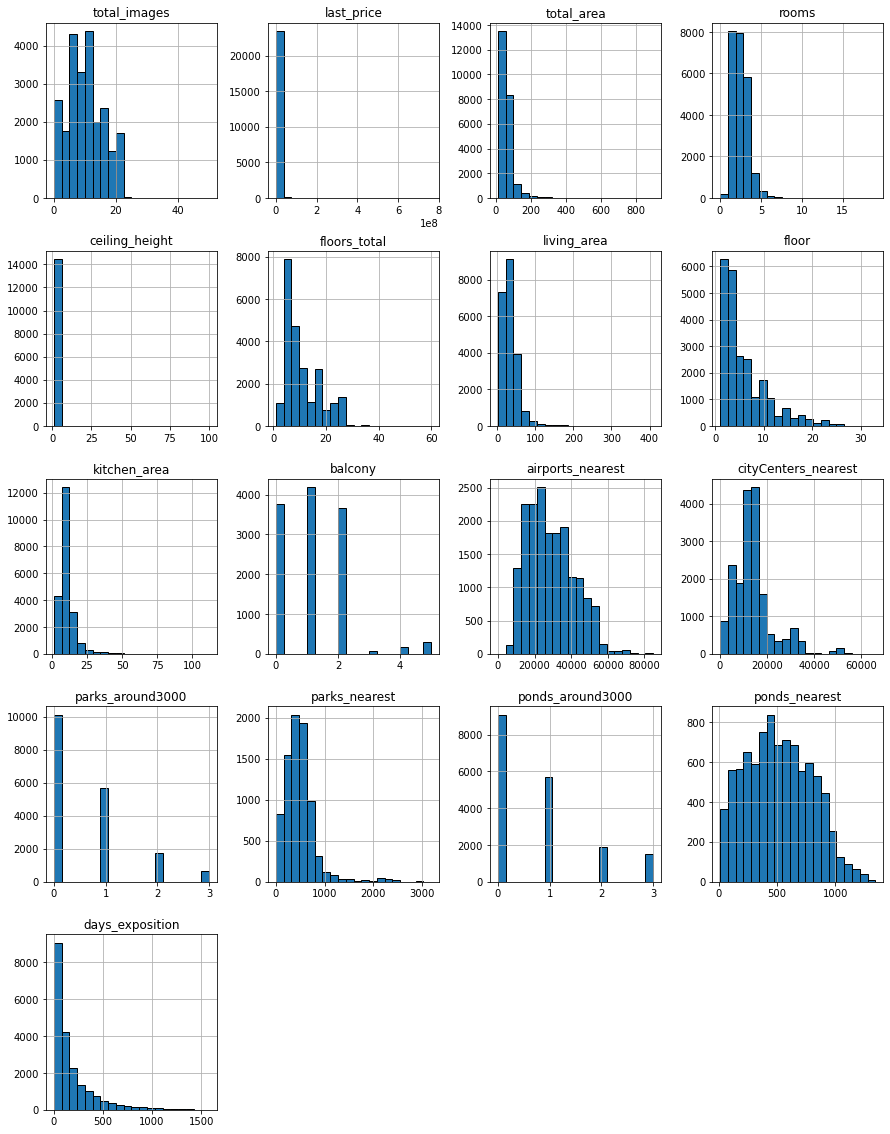

In [5]:
df.hist(bins=20, figsize=(15, 20), ec='black'),
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
В ходе просмотра данных наблюдаем, что в данных имеется много пропусков, вероятно это ошибка ввода данных, либо неверно настроены алгоритмы программы.
Явных дубликатов не обнаружено, есть необходимость поменять тип данных, и названия трёх колонок можно привести к соответсвующему стилю. Также при просмотре графиков мы можем наблюдать аномальные значения.
</div>

### Предобработка данных

#### Поменяем названия колонок

In [6]:
# мне не нравятся названия этих колонок, поэтому я приведу их к соответствующему стилю
df = df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000',
    }
)
# проверяем изменения
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Обработка пропусков, типа данных

In [7]:
# заполняем пропущенные значения апартаментов
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool') 
# заполняем пропущенные значения на 0, что будет означать отсуствие балконов и меняем на целочисленный тип данных
df['balcony'] = df['balcony'].fillna(0).astype('int')
# заполняем прощенные значения на 0, что будет означать отсуствие в пределах 3км парков и водохранилищ
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype('int')
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype('int')
# меняем на целочисленный тип данных стоимость квартиры
df['last_price'] = df['last_price'].astype('int')
# меняем на тип даты даты публикаций
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# удаляем строки где отсутсвует название локации и всего этажей в доме, так как данных мало и не повлечет за собой последствий
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)
# меняем на целочисленный тип данных всего этажей в доме
df['floors_total'] = df['floors_total'].astype('int')
# заполняем пропуски значением 99999 - это будет означать, что значение пропущено 
# и тем самым сможем поменять тип данных на целочисленный
df['days_exposition'].fillna(99999, inplace=True)
df['days_exposition'] = df['days_exposition'].astype('int')
# проверяем изменения кол-ва пропущенных значений
#df.isna().sum()

#### Обработка неявных дубликатов

In [8]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [9]:
#приведём все к нижнему регистру, чтобы уменьшить вероятность неявных дубликатов
df['locality_name'] = df['locality_name'].str.lower()

In [10]:
# заменим некоторые строки,чтобы избавиться от дубликатов
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок') 
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
# проверяем исправление
#df['locality_name'].unique() 

In [11]:
df['locality_name'].value_counts().head(20)

санкт-петербург            15651
посёлок мурино               552
посёлок шушары               439
всеволожск                   398
пушкин                       369
колпино                      338
посёлок парголово            327
гатчина                      307
деревня кудрово              299
выборг                       237
петергоф                     201
сестрорецк                   183
красное село                 176
кудрово                      171
деревня новое девяткино      143
сертолово                    142
ломоносов                    133
кириши                       125
посёлок бугры                113
сланцы                       112
Name: locality_name, dtype: int64

#### Обработка пропусков(продолжение)

**Выявлем возможность влияния параметров большого количества данных по Санкт-Петербургу на общую медиану**

In [12]:
median_spb_ceiling = df.loc[df['locality_name'] == 'санкт-петербург', 'ceiling_height'].median()
median_other_ceiling = df.loc[df['locality_name'] != 'санкт-петербург', 'ceiling_height'].median()
display('Высота потолков Санкт-Петербурга:', median_spb_ceiling)
display('Высота потолков других поселений:', median_other_ceiling)

median_spb_living_area = df.loc[df['locality_name'] == 'санкт-петербург', 'living_area'].median()
median_other_living_area = df.loc[df['locality_name'] != 'санкт-петербург', 'living_area'].median()
display('Жилая площадь Санкт-Петербурга:', median_spb_living_area)
display('Жилая площадь других поселений:', median_other_living_area)

median_spb_kitchen_area = df.loc[df['locality_name'] == 'санкт-петербург', 'kitchen_area'].median()
median_other_kitchen_area = df.loc[df['locality_name'] != 'санкт-петербург', 'kitchen_area'].median()
display('Площадь кухни Санкт-Петербурга:', median_spb_kitchen_area)
display('Площадь кухни других поселений:', median_other_kitchen_area)

'Высота потолков Санкт-Петербурга:'

2.7

'Высота потолков других поселений:'

2.6

'Жилая площадь Санкт-Петербурга:'

31.3

'Жилая площадь других поселений:'

28.0

'Площадь кухни Санкт-Петербурга:'

9.9

'Площадь кухни других поселений:'

8.9

**Видим, что влияния минимальное. Буду заполнять пропуски медианной по местности**

In [13]:
# подавляем Runtimewarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for t in df['locality_name'].unique(): # заполянем медианной по местности
        df.loc[(df['locality_name'] == t) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
        df.loc[(df['locality_name'] == t), 'ceiling_height'].median()
# те пропуски, что не заполнились, за полним общей медианной
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [14]:
# тоже самое делаем с жилой площадью
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for t in df['locality_name'].unique():
        df.loc[(df['locality_name'] == t) & (df['living_area'].isna()), 'living_area'] = \
        df.loc[(df['locality_name'] == t), 'living_area'].median()
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

In [15]:
# тоже самое делаем с кухонной площадью
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for t in df['locality_name'].unique():
        df.loc[(df['locality_name'] == t) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
        df.loc[(df['locality_name'] == t), 'kitchen_area'].median()
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

In [16]:
# тоже самое делаем с расстоянием до аэропорта
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for t in df['locality_name'].unique():
        df.loc[(df['locality_name'] == t) & (df['airports_nearest'].isna()), 'airports_nearest'] = \
        df.loc[(df['locality_name'] == t), 'airports_nearest'].median()
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

In [17]:
# тоже самое делаем с расстоянием до центра
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for t in df['locality_name'].unique():
        df.loc[(df['locality_name'] == t) & (df['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
        df.loc[(df['locality_name'] == t), 'city_centers_nearest'].median()
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())

In [18]:
# тоже самое делаем с расстоянием до парка
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for t in df['locality_name'].unique():
        df.loc[(df['locality_name'] == t) & (df['parks_around_3000'] != 0) & (df['parks_nearest'].isna()), 'parks_nearest'] = \
        df.loc[(df['locality_name'] == t), 'parks_nearest'].median()
# для тех у кого нет парков в районе 3 км заполняем расстояние 99999
df['parks_nearest'] = df['parks_nearest'].fillna(99999)

In [19]:
# тоже самое делаем с расстоянием до водоемов
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for t in df['locality_name'].unique():
        df.loc[(df['locality_name'] == t) & (df['parks_around_3000'] != 0) & (df['ponds_nearest'].isna()), 'ponds_nearest'] = \
        df.loc[(df['locality_name'] == t), 'ponds_nearest'].median()
# для тех у кого нет водоёмов в районе 3 км заполняем расстояние 99999
df['ponds_nearest'] = df['ponds_nearest'].fillna(99999)

In [20]:
# проверяем, что пропуски исчезли
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

#### Обработка аномальных значений и выбросов

In [21]:
# вызываем метод для обнаружения аномалий и выбросов
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.732127,10.675875,34.066800,5.878124,10.461214,0.593677,28321.625398,13936.572396,0.468831,66090.550647,0.589900,48176.897645,13612.682750
std,5.681156,1.091093e+07,35.657060,1.078591,1.004422,6.594823,21.245052,4.871485,5.635781,0.960660,11091.054463,7567.649913,0.748403,47164.896044,0.883966,49700.766300,34065.040353
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.200000,0.000000,21156.000000,10935.000000,0.000000,601.000000,0.000000,504.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.700000,9.000000,30.400000,4.000000,9.600000,0.000000,26763.000000,13073.000000,0.000000,99999.000000,0.000000,966.000000,124.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34324.000000,15247.000000,1.000000,99999.000000,1.000000,99999.000000,390.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,99999.000000,3.000000,99999.000000,99999.000000


In [22]:
# меняем значение комнат с 0 на одну 
df.loc[df['rooms'] == 0, 'rooms'] = 1
# меняем аномально введеные значения
# df['ceiling_height'].unique()
df.loc[(df['ceiling_height'] >= 8) & (df['ceiling_height'] <= 100), 'ceiling_height'] = df['ceiling_height'] * 0.1

In [23]:
# узнаем квартили, чтобы убрать выбросы
#display(df['total_area'].quantile([0.05, 0.95]))
#display(df['rooms'].quantile([0.05, 0.95]))
#display(df['ceiling_height'].quantile([0.05, 0.95]))
#display(df['floors_total'].quantile([0.05, 0.95]))
#display(df['living_area'].quantile([0.05, 0.95]))
#display(df['floor'].quantile([0.05, 0.95]))
#display(df['kitchen_area'].quantile([0.05, 0.95]))
#display(df['total_images'].quantile([0.05, 0.95]))
#display(df['last_price'].quantile([0.05, 0.95]))

In [24]:
# df['ceiling_height'].unique()
# убираем выбросы общей площади
df = df.loc[(df['total_area'] >= 31) & (df['total_area'] <= 116)]
# убираем выбросы комнат
df = df.loc[(df['rooms'] >= 1) & (df['rooms'] <= 4)]
# убираем выбросы высоты потолка
df = df.loc[(df['ceiling_height'] >= 2.5) & (df['ceiling_height'] <= 3.1245)]
# убираем выбросы этажности
df = df.loc[(df['floors_total'] >= 1) & (df['floors_total'] <= 25)]
# убираем выбросы жилой площади 
df = df.loc[(df['living_area'] >= 15.4) & (df['living_area'] <= 67)]
# убираем выбросы этажей
df = df.loc[(df['floor'] >= 1) & (df['floor'] <= 16)]
# убираем выбросы кухонной площади
df = df.loc[(df['kitchen_area'] >= 5.5) & (df['kitchen_area'] <= 19.6)]
# убираем выбросы цен
df = df.loc[(df['last_price'] >= 1860000) & (df['last_price'] <= 15300000)]


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Большое количество пропущенных значений было исправлено. Аномальные значения и выбросы отброшены
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим в таблицу столбец цены за квадратный метр

In [25]:
# добавим и подсчитаем цену за квадратный метр
df['price_m2'] = (df['last_price'] / df['total_area']).astype('int')

####  Добавим в таблицу столбцы день, месяц, год публикации

In [26]:
# добавим в таблицу день публикации
df['day_exposition'] = df['first_day_exposition'].dt.dayofweek
# добавим в таблицу месяц публикации
df['month_exposition'] = df['first_day_exposition'].dt.month
# добавим в таблицу год публикации
df['year_exposition'] = df['first_day_exposition'].dt.year

####  Добавим в таблицу столбец тип этажа

In [27]:
# распределим с помощью функции тип этажа
def categorize_floor(row):
    if row['floor'] == 1:
            return 'первый'
    elif row['floors_total'] == row['floor']:
            return 'последний'
    else:
            return 'другой'
# добавим в таблицу     
df['floor_category'] = df.apply(categorize_floor, axis=1)

####  Добавим в таблицу столбец расстояние до центра города в км

In [28]:
# переведём из метров в км и добавим в таблицу
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).astype('int')

In [29]:
# проверка
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,99999.0,0,99999.0,81,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,90.0,2,574.0,558,92785,3,8,2015,другой,13
9,18,5400000,61.0,2017-02-26,3,2.500,9,43.6,7,False,...,99999.0,0,99999.0,289,88524,6,2,2017,другой,15
10,5,5050000,39.6,2017-11-16,1,2.670,12,20.3,3,False,...,310.0,2,553.0,137,127525,3,11,2017,другой,13
11,9,3300000,44.0,2018-08-27,2,2.550,5,31.0,4,False,...,99999.0,0,99999.0,7,75000,0,8,2018,другой,51


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
Добавили новые столбцы в таблицу и убедились, что данные выглядят корректно, теперь можно приступать к анализу данных
</div>

### Проведите исследовательский анализ данных

#### Изучение параметров

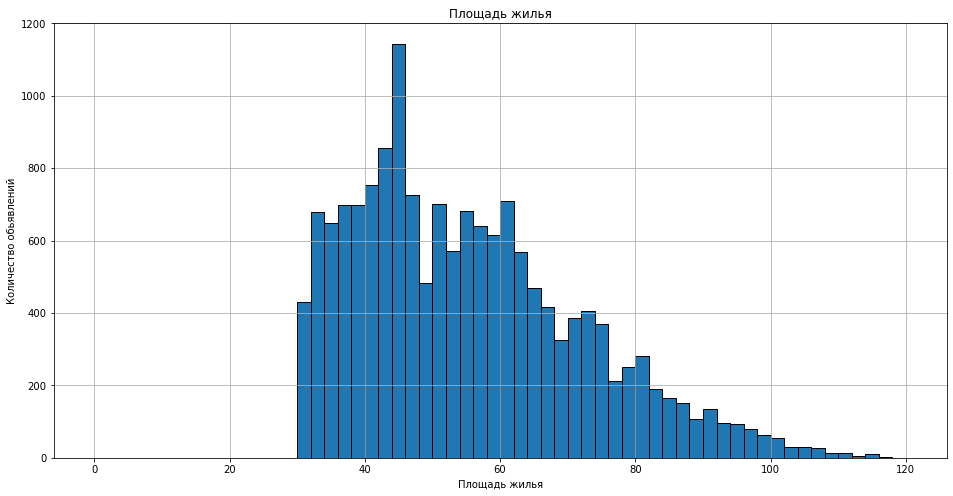

In [30]:
df['total_area'].plot(kind='hist', bins=60, range=(0, 120), grid=True, figsize=(16, 8), ec='black')
plt.title('Площадь жилья')
plt.xlabel('Площадь жилья')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений с площадью квартиры находится в области 42-46 м²
</div>

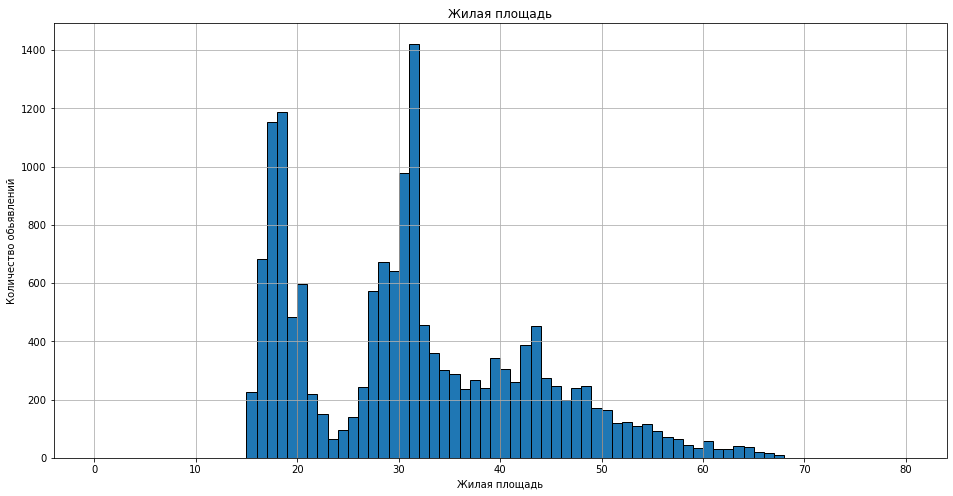

In [31]:
df['living_area'].plot(kind='hist', bins=80, range=(0, 80), grid=True, figsize=(16, 8), ec='black')
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений с  жилой площадью квартиры находится в области 17-19 м² и 
30-32 м²
</div>

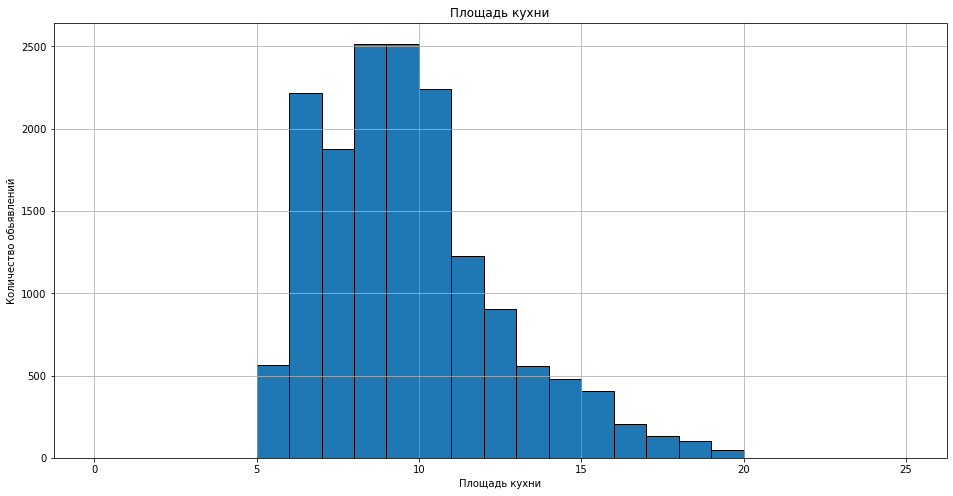

In [32]:
df['kitchen_area'].plot(kind='hist', bins=25, range=(0, 25), grid=True, figsize=(16, 8), ec='black')
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений с кухонной площадью квартиры находится в области 8-10 м²
</div>

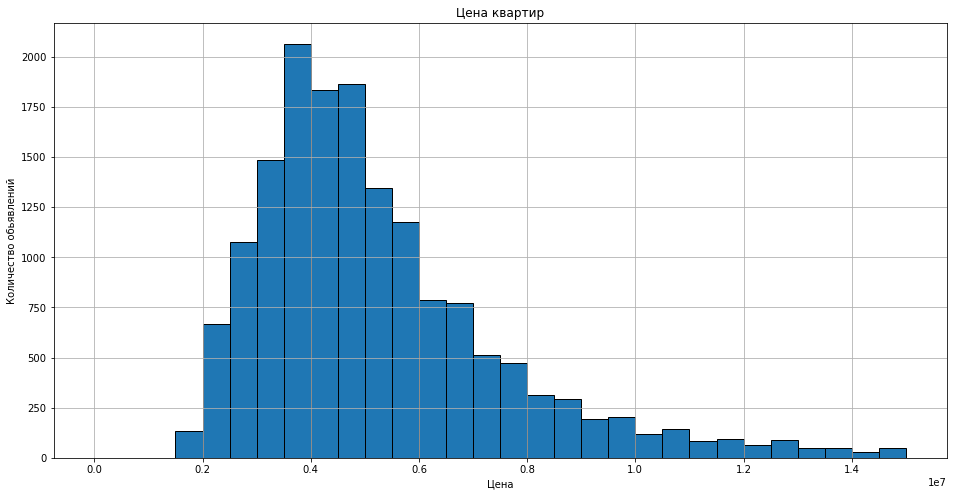

In [33]:
df['last_price'].plot(kind='hist', bins=30, range=(0, 15000000), grid=True, figsize=(16, 8), ec='black')
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений с ценной за квартиру в области 3.750.000 по 5.000.000
</div>

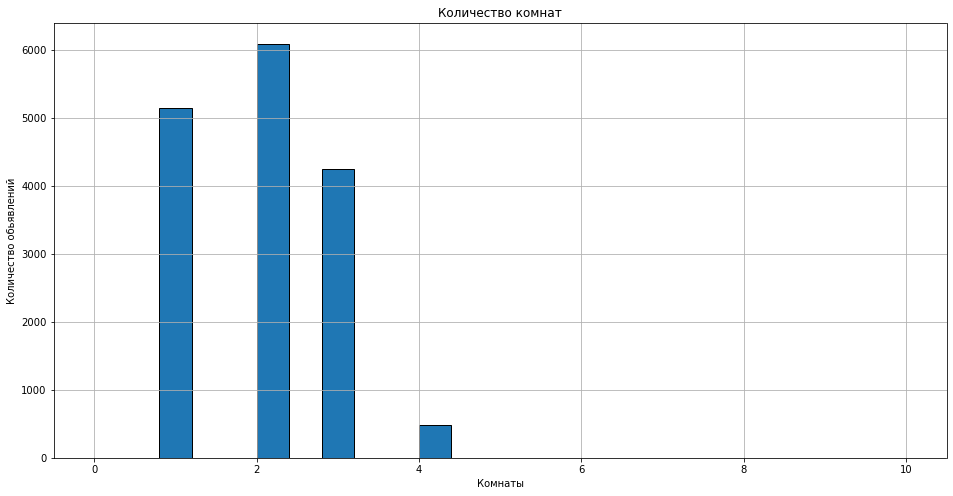

In [34]:
df['rooms'].plot(kind='hist', bins=25, range=(0, 10), grid=True, figsize=(16, 8), ec='black')
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходится на двухкомнатные квартиры
</div>

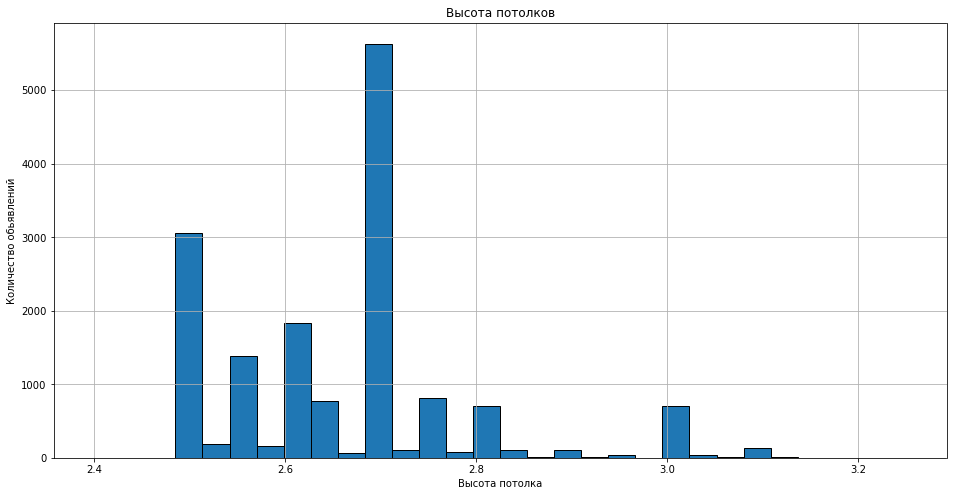

In [35]:
df['ceiling_height'].plot(kind='hist', bins=30, range=(2.4, 3.25), grid=True, figsize=(16, 8), ec='black')
plt.title('Высота потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходится на высоту потолка в квартире 2.7 м
</div>

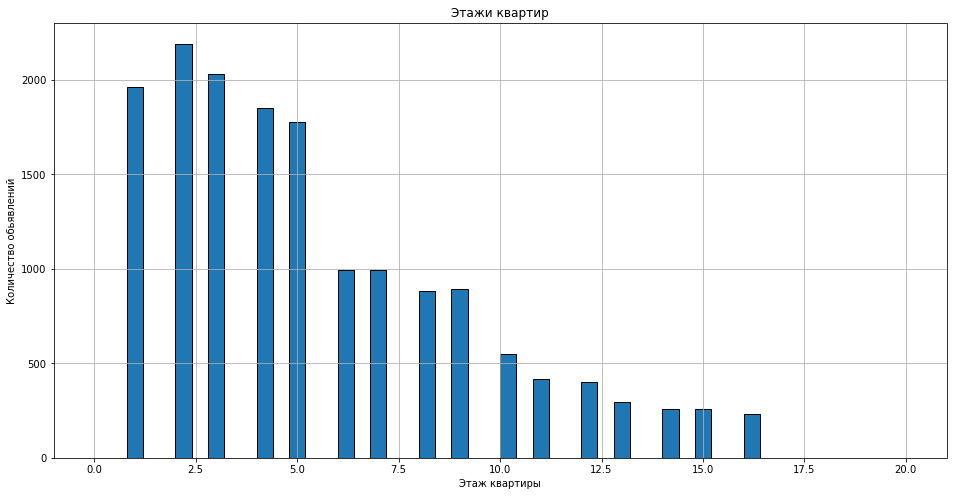

In [36]:
df['floor'].plot(kind='hist', bins=50, range=(0, 20), grid=True, figsize=(16, 8), ec='black')
plt.title('Этажи квартир')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходятся на 1 - 4 этажи
</div>

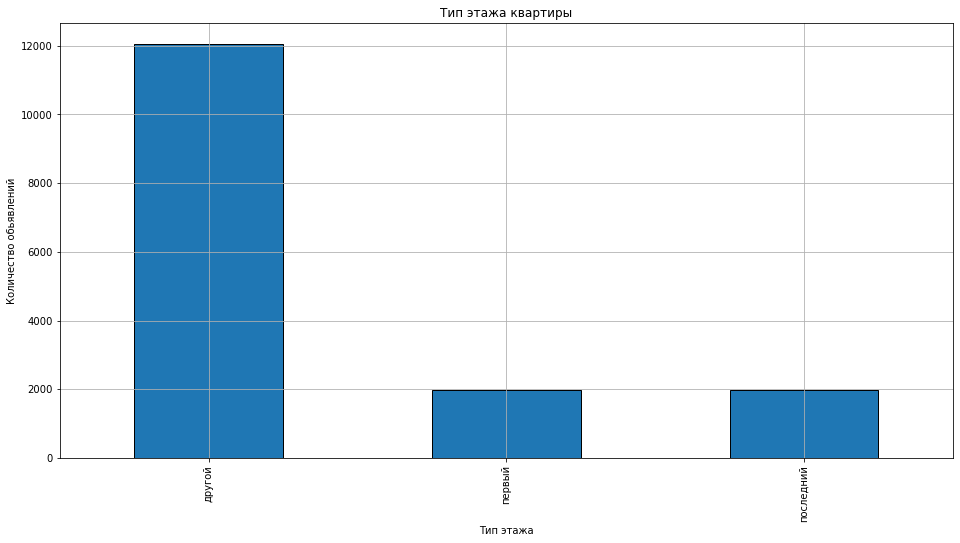

In [37]:
df['floor_category'].value_counts().plot(kind='bar', grid=True, figsize=(16, 8), ec='black')
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходятся на промежуточные этажи между первым и последним
</div>

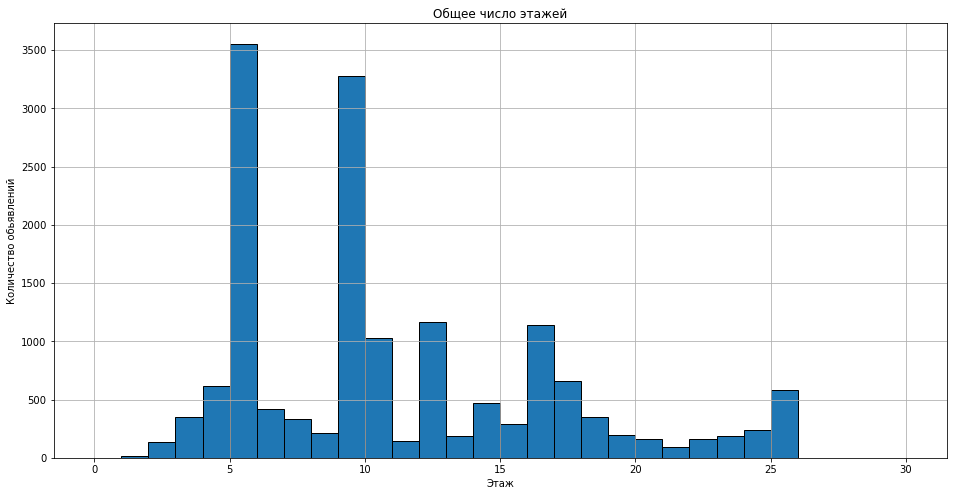

In [38]:
df['floors_total'].plot(kind='hist', bins=30, range=(0, 30), grid=True, figsize=(16, 8), ec='black')
plt.title('Общее число этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений преобаладают 5-ти и 9-ти этажки
</div>

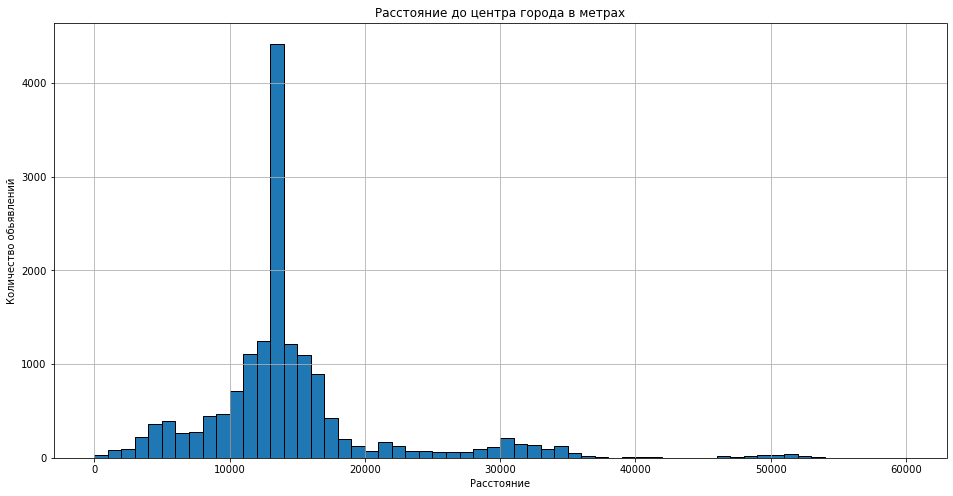

In [39]:
df['city_centers_nearest'].plot(kind='hist', bins=60, range=(0, 60000), grid=True, figsize=(16, 8), ec='black')
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходится на расстояние от центра в 13-15км, 14 км выглядит аномальным за счёт заполнения пропусков медианой
</div>

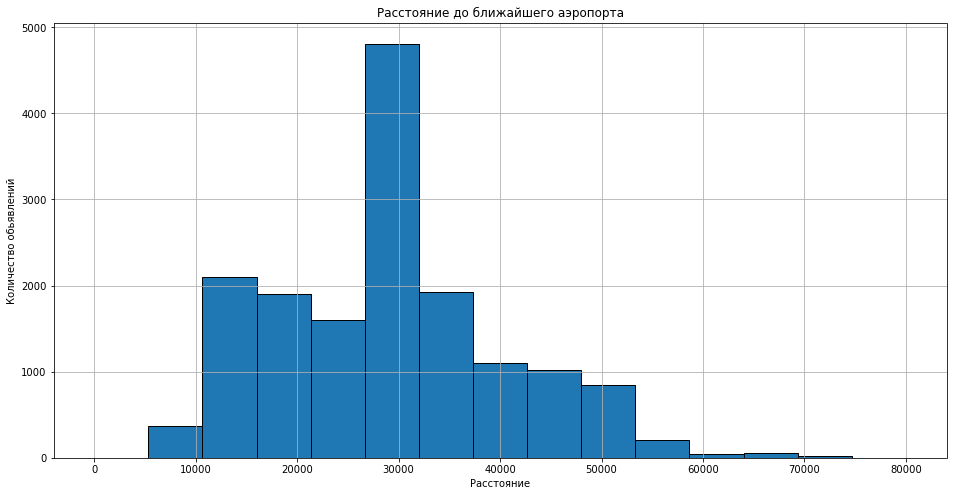

In [40]:
df['airports_nearest'].plot(kind='hist', bins=15, range=(0, 80000), grid=True, figsize=(16, 8), ec='black')
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходится на расстояние от аэропорта 2.7 до 3.2 км
</div>

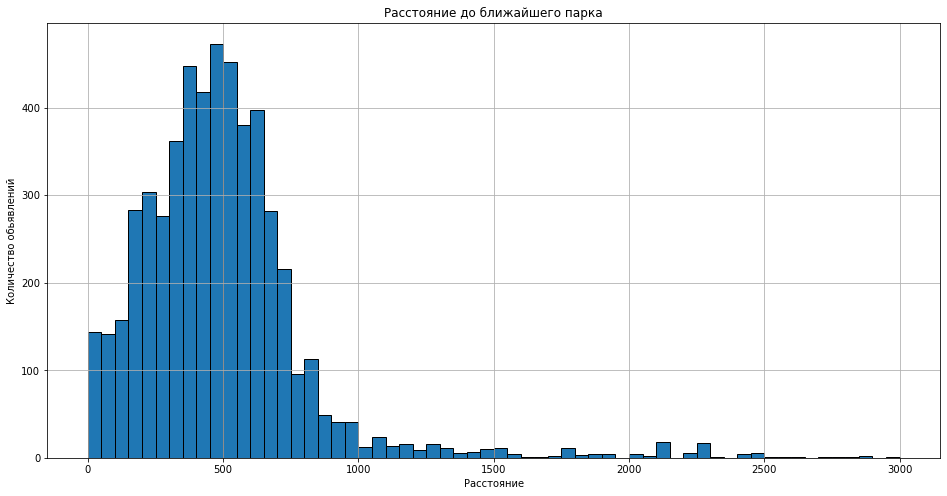

In [41]:
df['parks_nearest'].plot(kind='hist', bins=60, range=(0, 3000), grid=True, figsize=(16, 8), ec='black')
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходится на расстояние до ближайшего парка в 400-550 м
</div>

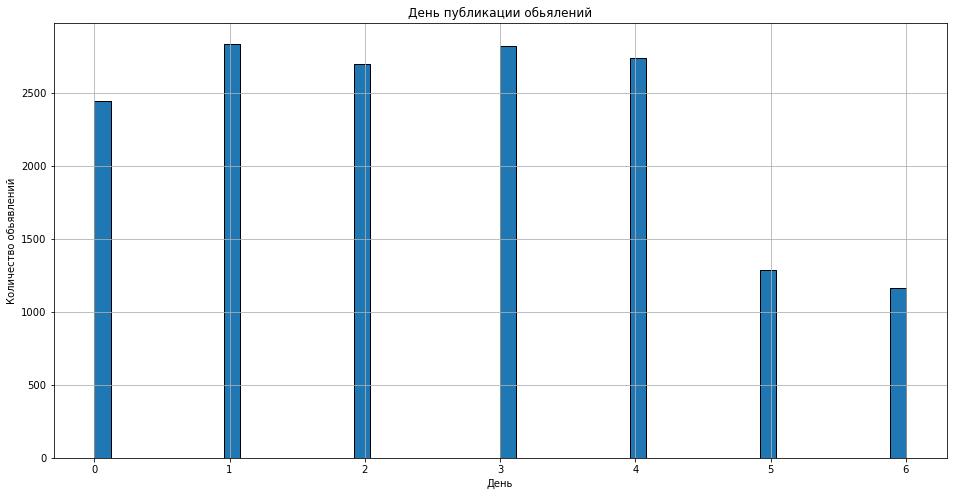

In [42]:
df['day_exposition'].plot(kind='hist', bins=50, range=(0, 6), grid=True, figsize=(16, 8), ec='black')
plt.title('День публикации обьялений')
plt.xlabel('День')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений публикуются в будние дни
</div>

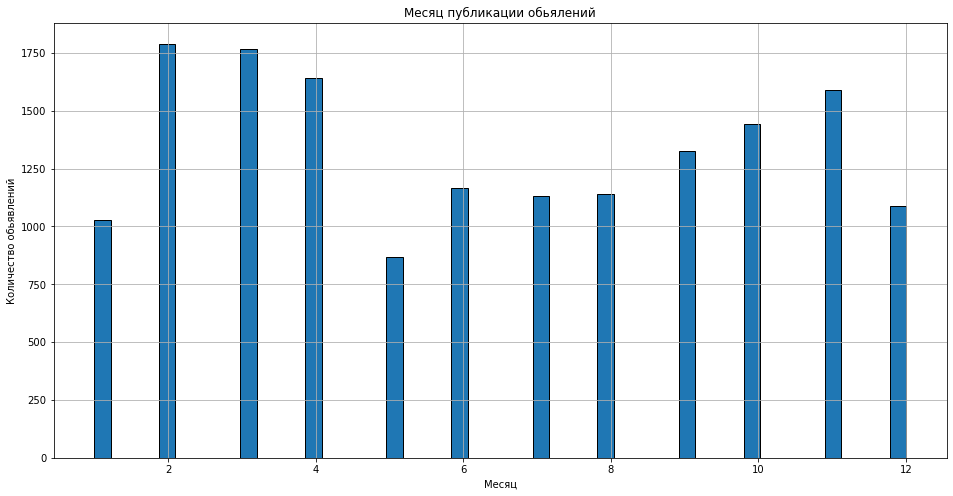

In [43]:
df['month_exposition'].plot(kind='hist', bins=50, range=(1, 12), grid=True, figsize=(16, 8), ec='black')
plt.title('Месяц публикации обьялений')
plt.xlabel('Месяц')
plt.ylabel('Количество обьявлений')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
На данном графике видим, что наибольшее количество обьявлений приходится с февраля по апрель включительно и в осеннее время с сентября по ноябрь включительно
</div>

####  Сроки продажи квартир

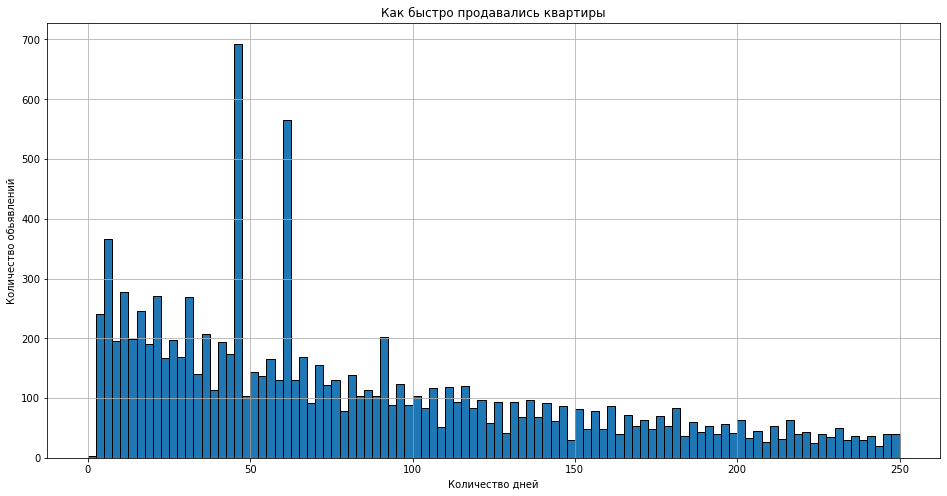

Время продажи(медиана): 91 

Время продажи(среднее): 172 



In [44]:
(
    df.query('days_exposition != 99999')['days_exposition']
    .plot(kind='hist', bins=100, range=(0, 250), grid=True, figsize=(16, 8), ec='black')
)
plt.title('Как быстро продавались квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество обьявлений')
plt.show()
print('Время продажи(медиана):', round(df.query('days_exposition != 99999')['days_exposition'].median()), '\n')
print('Время продажи(среднее):', round(df.query('days_exposition != 99999')['days_exposition'].mean()), '\n')

In [45]:
df.query('days_exposition != 99999')['days_exposition'].describe()

count    14042.000000
mean       172.468167
std        211.613109
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
Обычно продажа квартиры занимает от 43 до 216 дней. Самые быстрые продажи занимают до 42 дней, а долгие свыше 216 дней

Также видим аномалии на 45 и 60 день, это явно связано с сроком объявления.
</div>

#### Факторы влияния на стоимость объекта

##### Влияния общей площади на цену 

In [46]:
# посмотрим коэффициент корреляции Пирсона
print('Коэффицент кореляции', df['total_area'].corr(df['last_price']),'\n')
# поменяем обратно местами 
print('Коэффицент кореляции', df['last_price'].corr(df['total_area']),'\n')

Коэффицент кореляции 0.6885040931177704 

Коэффицент кореляции 0.6885040931177703 



<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе
</div>


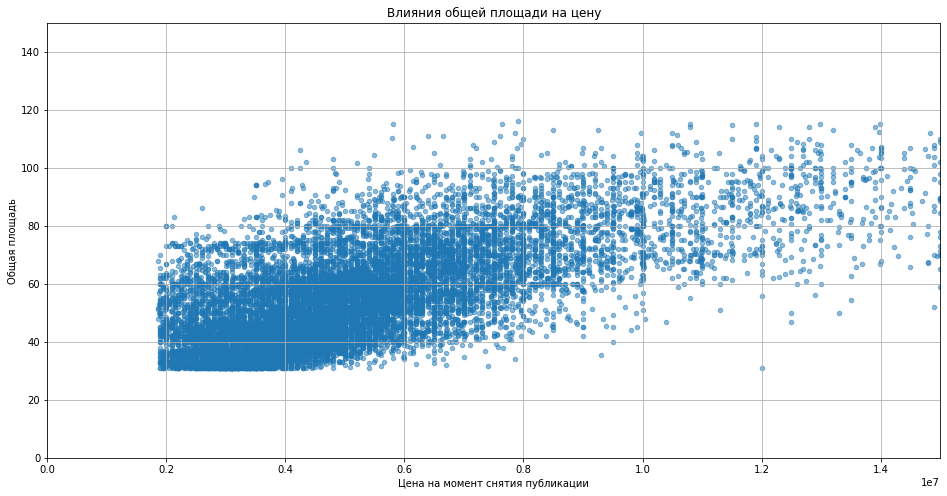

In [47]:
df.plot(kind='scatter', x='last_price', y='total_area', ylim=(0, 150), xlim=(0, 15000000), grid=True,  figsize=(16, 8), alpha=0.5)
plt.title('Влияния общей площади на цену')
plt.xlabel('Цена на момент снятия публикации')
plt.ylabel('Общая площадь')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
На данном графике мы видим, что цена квартиры от увеличения площади растёт, тоже самое подтвержает **коэффициент корреляции Пирсона** который равняется **`0.685`**, значит взаимосвязь есть
</div>


##### Влияния жилищной площади на цену 

In [48]:
# посмотрим коэффициент корреляции Пирсона
print('Коэффицент кореляции', df['living_area'].corr(df['last_price']),'\n')
# поменяем обратно местами 
print('Коэффицент кореляции', df['last_price'].corr(df['living_area']),'\n')

Коэффицент кореляции 0.5351492634767644 

Коэффицент кореляции 0.5351492634767644 



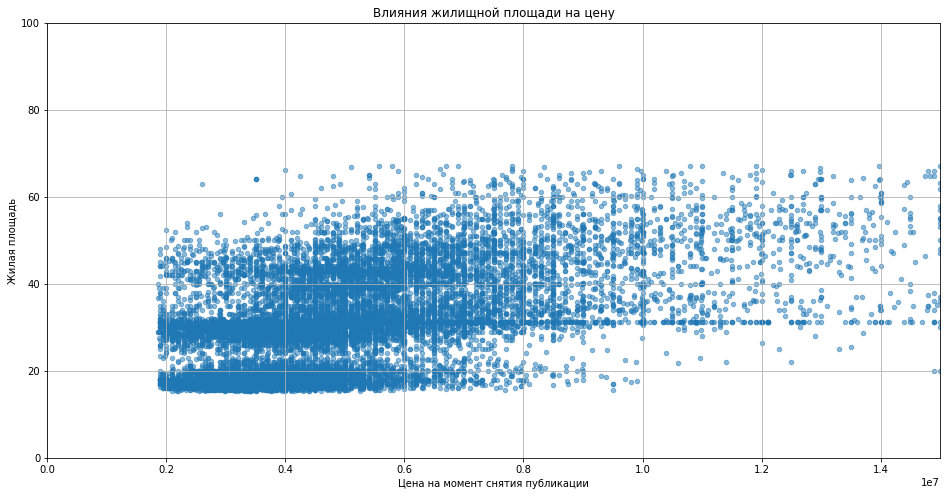

In [49]:
df.plot(kind='scatter', x='last_price', y='living_area', ylim=(0, 100), xlim=(0, 15000000), grid=True,  figsize=(16, 8), alpha=0.5)
plt.title('Влияния жилищной площади на цену')
plt.xlabel('Цена на момент снятия публикации')
plt.ylabel('Жилая площадь')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
На данном графике мы видим, что цена квартиры от увеличения жилой площади растёт, тоже самое подтвержает **коэффициент корреляции Пирсона** который равняется **`0.53`**, значит взаимосвязь есть, но уже меньше, чем к общей площади
</div>

##### Влияния кухонной площади на цену 

In [50]:
# посмотрим коэффициент корреляции Пирсона
print('Коэффицент кореляции', df['kitchen_area'].corr(df['last_price']),'\n')
# поменяем обратно местами 
print('Коэффицент кореляции', df['last_price'].corr(df['kitchen_area']),'\n')

Коэффицент кореляции 0.468177473700569 

Коэффицент кореляции 0.4681774737005689 



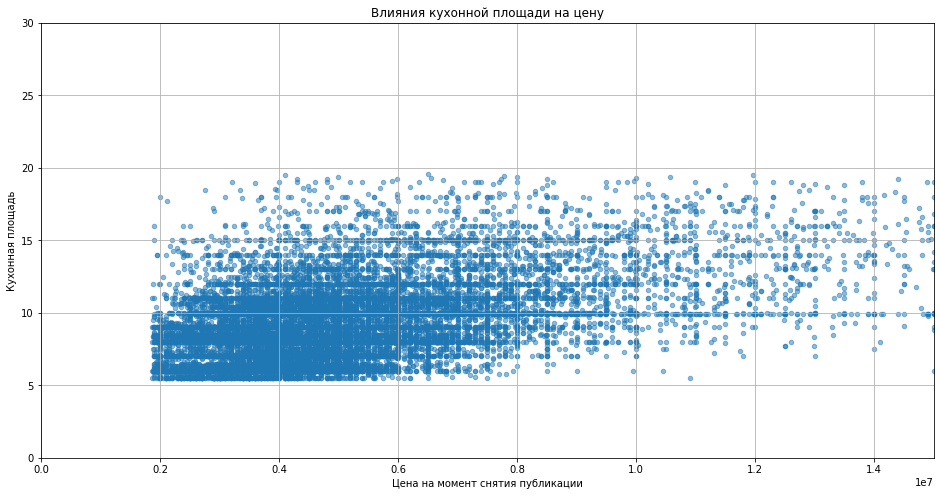

In [51]:
df.plot(kind='scatter', x='last_price', y='kitchen_area', ylim=(0, 30), xlim=(0, 15000000), grid=True,  figsize=(16, 8), alpha=0.5)
plt.title('Влияния кухонной площади на цену')
plt.xlabel('Цена на момент снятия публикации')
plt.ylabel('Кухонная площадь')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
На данном графике мы видим, что цена квартиры от увеличения кухонной площади растёт, тоже самое подтвержает **коэффициент корреляции Пирсона** который равняется **`0.468`** , значит взаимосвязь есть, но её все меньше. Напрашивается вывод, что цена больше зависит от общей площади квартиры
</div>

##### Влияния количества комнат на цену 

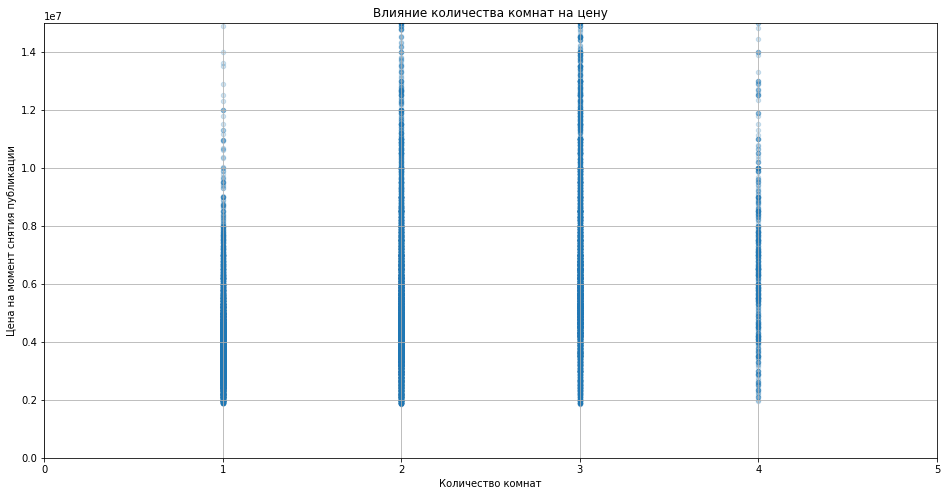

In [52]:
df.plot(kind='scatter', x='rooms', y='last_price', ylim=(0, 15000000), xlim=(0, 5), grid=True,  figsize=(16, 8), alpha=0.2)
plt.title('Влияние количества комнат на цену')
plt.ylabel('Цена на момент снятия публикации')
plt.xlabel('Количество комнат')
plt.show()

In [53]:
# сделаем сводную таблицу, чтобы узнать сколько 4-ых комнатных квартир 
rooms_count = df.pivot_table(index='rooms', values='last_price', aggfunc='count')
rooms_count.columns = ['Количество']
display(rooms_count)

,Количество
rooms,
1,5155
2,6096
3,4247
4,484


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
На данном графике мы видим, что цена квартиры с увеличением комнат растёт, что мы особого не можем сказать про четырехкомнатные, потому что данных недостаточно
</div>

##### Влияния типа этажа на цену 

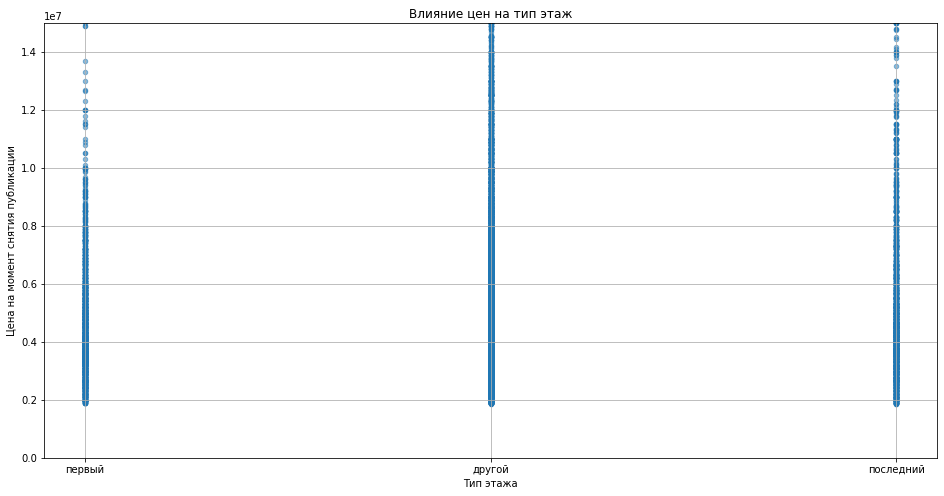

In [54]:
df.plot(kind='scatter', x='floor_category', y='last_price', ylim=(0, 15000000), grid=True,  figsize=(16, 8), alpha=0.5)
plt.title('Влияние цен на тип этаж')
plt.xlabel('Тип этажа')
plt.ylabel('Цена на момент снятия публикации')
plt.show()

In [55]:
# сделаем сводную таблицу
type_count = df.pivot_table(index='floor_category', values='last_price', aggfunc='count')
type_count.columns = ['Количество']
display(type_count)

,Количество
floor_category,
другой,12056
первый,1963
последний,1963


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
На данном графике мы видим, что связь цены к типу выражена не сильно. Квартиры на первом этаже и последнем чаще стоят дешевле, чем другие. Также заметим, что другие этажи выкладывают больше
</div>

#####  Влияние дня, месяца, года на цену 

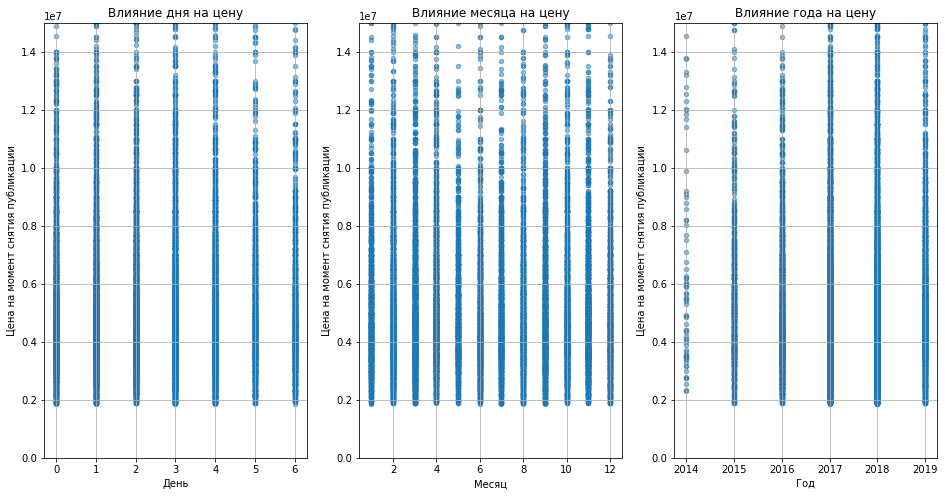

In [56]:
fig, axs = plt.subplots(1, 3)

df.plot(ax=axs[0], kind='scatter', y='last_price', x='day_exposition', ylim=(0, 15000000), grid=True,  figsize=(16, 8), alpha=0.5)
axs[0].set_title('Влияние дня на цену')
axs[0].set_xlabel('День')
axs[0].set_ylabel('Цена на момент снятия публикации')

df.plot(ax=axs[1], kind='scatter', y='last_price', x='month_exposition', ylim=(0, 15000000), grid=True,  figsize=(16, 8), alpha=0.5)
axs[1].set_title('Влияние месяца на цену')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Цена на момент снятия публикации')

df.plot(ax=axs[2], kind='scatter', y='last_price', x='year_exposition', ylim=(0, 15000000), grid=True,  figsize=(16, 8), alpha=0.5)
axs[2].set_title('Влияние года на цену')
axs[2].set_xlabel('Год')
axs[2].set_ylabel('Цена на момент снятия публикации')

plt.show()

In [57]:
day_count = df.pivot_table(index='day_exposition', values='last_price', aggfunc='count')
day_count.columns = ['Количество']
display(day_count)

,Количество
day_exposition,
0,2445
1,2836
2,2697
3,2817
4,2735
5,1289
6,1163


In [58]:
month_count = df.pivot_table(index='month_exposition', values='last_price', aggfunc='count')
month_count.columns = ['Количество']
display(month_count)

,Количество
month_exposition,
1,1028
2,1790
3,1768
4,1643
5,868
6,1167
7,1133
8,1142
9,1326


In [59]:
year_count = df.pivot_table(index='year_exposition', values='last_price', aggfunc='count')
year_count.columns = ['Количество']
display(year_count)

,Количество
year_exposition,
2014,74
2015,751
2016,1873
2017,5558
2018,5752
2019,1974


In [60]:
display(df[['day_exposition','month_exposition','year_exposition','last_price']].corr())

,day_exposition,month_exposition,year_exposition,last_price
day_exposition,1.000000,0.014299,0.002026,-0.007453
month_exposition,0.014299,1.000000,-0.269805,0.003110
year_exposition,0.002026,-0.269805,1.000000,0.014013
last_price,-0.007453,0.003110,0.014013,1.000000


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
По рассмотренным графикам и данным мы можем утверждать, что зависимости никакой нет, но можем ответить, что по выходным цена немного меньше, а основные доли обьявлений приходятся на 2017-2018 года
</div>

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [61]:
# просматриваем 10 населенных пунктов с наибольшем числом обьявлений
df['locality_name'].value_counts().head(10)

санкт-петербург    10967
всеволожск           331
посёлок шушары       322
колпино              288
посёлок мурино       280
пушкин               247
гатчина              238
деревня кудрово      186
выборг               161
петергоф             150
Name: locality_name, dtype: int64

In [62]:
# делаем сводную таблицу
city_price_m2 = df.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'median'])
city_price_m2.columns = ['Количество обьявлений', 'Средняя цена за метр']
city_price_m2 = city_price_m2.astype(int)
city_price_m2.sort_values(by='Количество обьявлений', ascending=False).head(10)

,Количество обьявлений,Средняя цена за метр
locality_name,,
санкт-петербург,10967,101518
всеволожск,331,65081
посёлок шушары,322,75019
колпино,288,74729
посёлок мурино,280,80924
пушкин,247,99542
гатчина,238,68516
деревня кудрово,186,91547
выборг,161,58426


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Санкт-Петербург - самая высокая цена за квадратный метр. Выборг - самая низкая цена за квадратный метр
</div>

#### Средняя цена за килломметр. Зависимость

In [63]:
# построим сводную таблицу
city_nearest_price_km_spb = (
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')
)
city_nearest_price_km_spb.columns = ['Средняя цена квартиры']
city_nearest_price_km_spb = city_nearest_price_km_spb.astype('int')
display(city_nearest_price_km_spb)

,Средняя цена квартиры
city_centers_nearest_km,
0,8000000
1,8250000
2,7600000
3,7020000
4,7700000
5,7405000
6,6650000
7,6650000
8,6082790


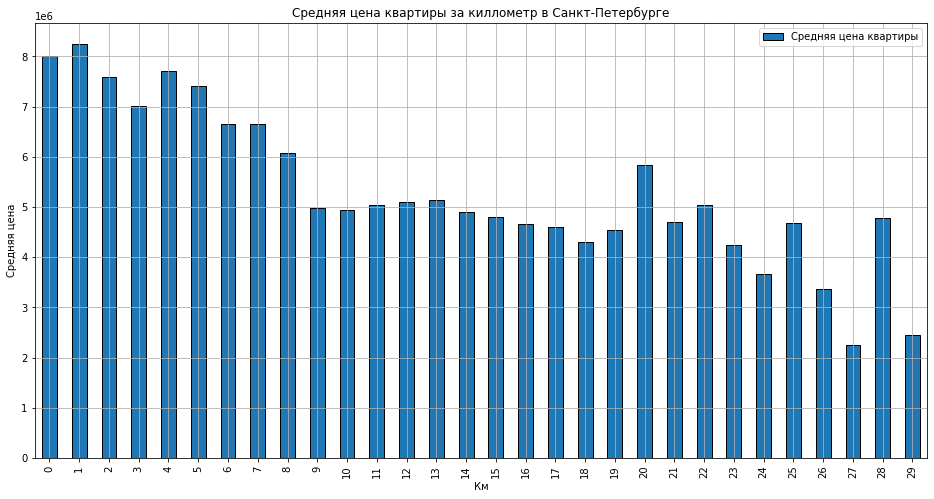

In [64]:
city_nearest_price_km_spb.plot(kind='bar', grid=True, figsize=(16, 8), ec='black')
plt.title('Средняя цена квартиры за киллометр в Санкт-Петербурге')
plt.xlabel('Км')
plt.ylabel('Средняя цена')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
На данном графике зависимость четко прослеживается, что чем ближе к центру города, тем цена выше, соответственно чем дальше от центра, тем и меньше цена. Также мы можем предположить центральную зону, она заканчивается на 8 км
</div>

### Общий вывод

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

<b>1. Открыли файлы и изучили данные</b>
- было обнаружено множество пропусков
- не было обнаружено явных дубликатов
- выявлены неподходящие типы данных
- выявлена необходимость переименовать колонки в соответствие правильному стилю
- обнаружили множество аномальных значений
    
<b>2. Предобработка данных</b>
- заполнили пропуски
- поменяли типы данных
- обработали неявные дубликаты
- обработали аномальные значения и выбросы\
    
<b>3. Добавили новые столбцы</b>
- добавили столбец цены за квадратный метр
- добавили столбец дня, месяца, года публикаций
- добавили столбец типа этажа
- добавили столбец расстояния до центра

    
<b>4. Исследовательский анализ</b>
- изучили параметры
- изучили сроки продаж квартир
- изучили факторы влияния на стоимость объекта:
    * влияние общей площади на цену
    * влияние жилой площади на цену
    * влияние кухонной площади на цену
    * влияние количества комнат на цену
    * влияние типа этажа на цену
    * влияние времени на цену
- изучили среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений
- изучили среднюю цену за киломметр и зависимость

<br>
<br>
    
    
<b>Целью исследования было:</b>
- Поиск особенностей и зависимостей, которые есть на рынке недвижимости
- Найти параметры, по которым определяется цена недвижимости для определения системой аномалий и мошеннической активности  

<br>
<br>
    
<b>В ходе исследования было выявлено:</b>

- обычно продажа квартиры занимает от 43 до 216 дней
- на стоимость больше влияет площадь квартиры
- медианная стоимость квартир в Санкт Петербурге выше чем в области
- дороже всего квадратный метр в Санкт-Петербурге - 101518 р.
- дешевле всего квадратный метр в Выборге - 58426 р.
- первый и последний этаж продаются немного дешевле чем другие
- чем больше комнат в квартире, тем выше стоимость, вероятно это связано с увеличением общей площади

<br>
<br>    
    
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px">

<b>Рекомендации:</b>
- исправить алгоритмы для более корректного ввода данных
- ввести обязательные к заполнению поля
- исправить формат заполняемых полей
</div>
</div>